# Import Dataset

In [4]:
import numpy as np
from numpy import random as rd
import pandas as pd
import os

In [7]:
# Input data from csv file

path = os.getcwd()
data = pd.read_csv ('UCI_Credit_Card_dataset.csv') 
df = pd.DataFrame(data)

df.head(10)

,ID,default.payment.next.month,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,1,20000,Female,University,Married,24,2,2,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,1,120000,Female,University,Single,26,-1,2,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,0,90000,Female,University,Single,34,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,0,50000,Female,University,Married,37,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,0,50000,Male,University,Married,57,-1,0,-1,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
5,6,0,50000,Male,Graduate,Single,37,0,0,0,...,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
6,7,0,500000,Male,Graduate,Single,29,0,0,0,...,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0
7,8,0,100000,Female,University,Single,23,0,-1,-1,...,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0
8,9,0,140000,Female,High School,Married,28,0,0,2,...,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0
9,10,0,20000,Male,High School,Single,35,-2,-2,-2,...,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0


# Data Summary (Stats & Graphs)

In [3]:
df.shape

(30000, 25)

In [4]:
df.isnull().sum()

ID                             0
default.payment.next.month     0
LIMIT_BAL                      0
SEX                            0
EDUCATION                     14
MARRIAGE                      54
AGE                            0
PAY_1                          0
PAY_2                          0
PAY_3                          0
PAY_4                          0
PAY_5                          0
PAY_6                          0
BILL_AMT1                      0
BILL_AMT2                      0
BILL_AMT3                      0
BILL_AMT4                      0
BILL_AMT5                      0
BILL_AMT6                      0
PAY_AMT1                       0
PAY_AMT2                       0
PAY_AMT3                       0
PAY_AMT4                       0
PAY_AMT5                       0
PAY_AMT6                       0
dtype: int64

In [5]:
[set(df["SEX"]), set(df["EDUCATION"]), set(df["MARRIAGE"])]

[{'Female', 'Male'},
 {'Graduate', 'High School', 'Others', 'University', nan},
 {'Married', 'Others', 'Single', nan}]

In [46]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

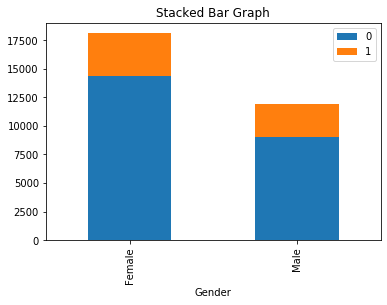

In [79]:
import matplotlib.pyplot as plt

female_default = df[df['SEX'] == 'Female']['default.payment.next.month']
male_default = df[df['SEX'] == 'Male']['default.payment.next.month']

sex_default = pd.DataFrame()
sex_default['Female'] = female_default.value_counts()
sex_default['Male'] = male_default.value_counts()
sex_default = np.transpose(sex_default)
sex_default['Gender'] = sex_default.index

sex_default.plot( 
    x = 'Gender', 
    kind = 'bar', 
    stacked = True, 
    title = 'Default by Gender') 

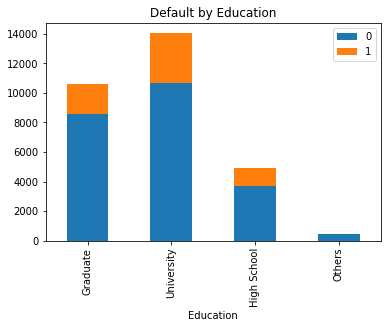

In [80]:
graduate_default = df[df['EDUCATION'] == 'Graduate']['default.payment.next.month']
uni_default = df[df['EDUCATION'] == 'University']['default.payment.next.month']
high_default = df[df['EDUCATION'] == 'High School']['default.payment.next.month']
others_default = df[df['EDUCATION'] == 'Others']['default.payment.next.month']

edu_default = pd.DataFrame()
edu_default['Graduate'] = graduate_default.value_counts()
edu_default['University'] = uni_default.value_counts()
edu_default['High School'] = high_default.value_counts()
edu_default['Others'] = others_default.value_counts()
edu_default = np.transpose(edu_default)
edu_default['Education'] = edu_default.index

edu_default.plot( 
    x = 'Education', 
    kind = 'bar', 
    stacked = True, 
    title = 'Default by Education') 

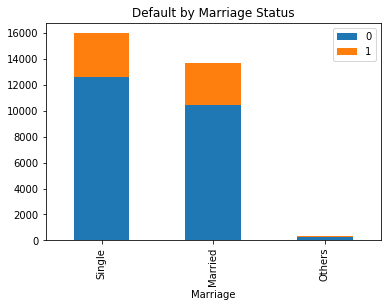

In [83]:
single_default = df[df['MARRIAGE'] == 'Single']['default.payment.next.month']
married_default = df[df['MARRIAGE'] == 'Married']['default.payment.next.month']
others_default = df[df['MARRIAGE'] == 'Others']['default.payment.next.month']

marriage_default = pd.DataFrame()
marriage_default['Single'] = single_default.value_counts()
marriage_default['Married'] = married_default.value_counts()
marriage_default['Others'] = others_default.value_counts()
marriage_default = np.transpose(marriage_default)
marriage_default['Marriage'] = marriage_default.index

marriage_default.plot( 
    x = 'Marriage', 
    kind = 'bar', 
    stacked = True, 
    title = 'Default by Marriage Status') 

In [6]:
np.transpose(df.describe())

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
default.payment.next.month,30000.0,0.221200,0.415062,0.0,0.00,0.0,0.00,1.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0


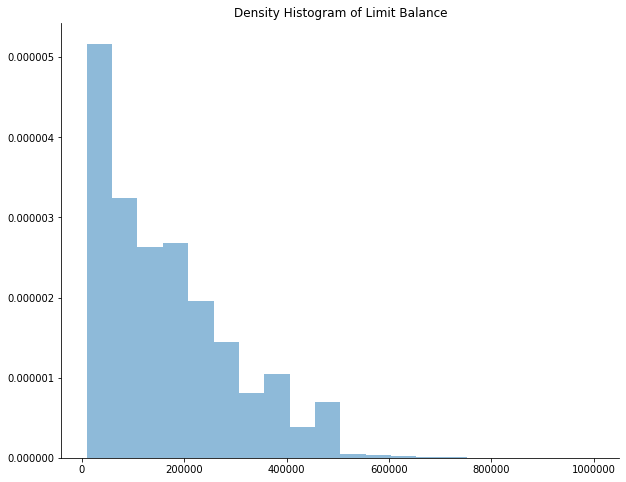

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.hist(df['LIMIT_BAL'], density = True, bins = 20, alpha = 0.5)
plt.title("Density Histogram of Limit Balance")
plt.show()

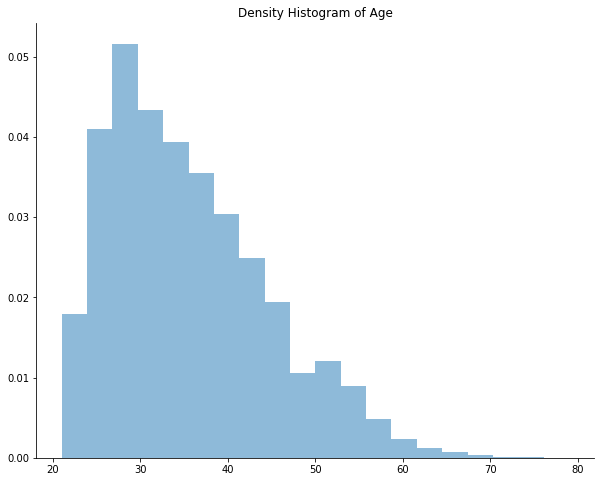

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.hist(df['AGE'], density = True, bins = 20, alpha = 0.5)
plt.title("Density Histogram of Age")
plt.show()

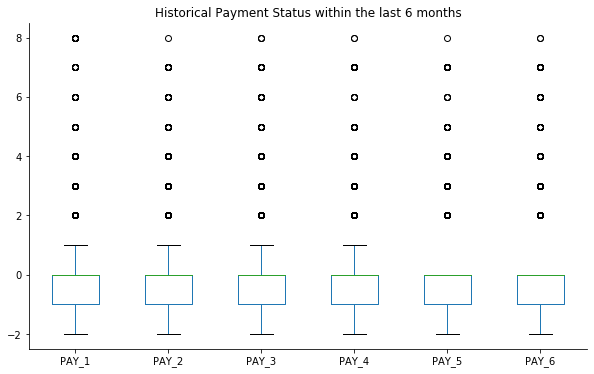

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
boxplot = df.iloc[:,7:13].boxplot(grid = False)
plt.title("Historical Payment Status within the last 6 months")
plt.show()

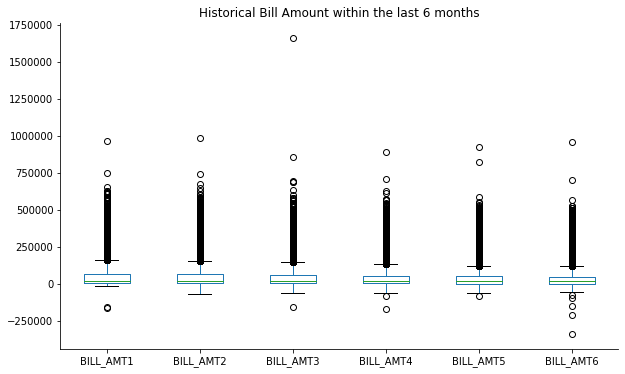

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
boxplot = df.iloc[:,13:19].boxplot(grid = False)
plt.title("Historical Bill Amount within the last 6 months")
plt.show()

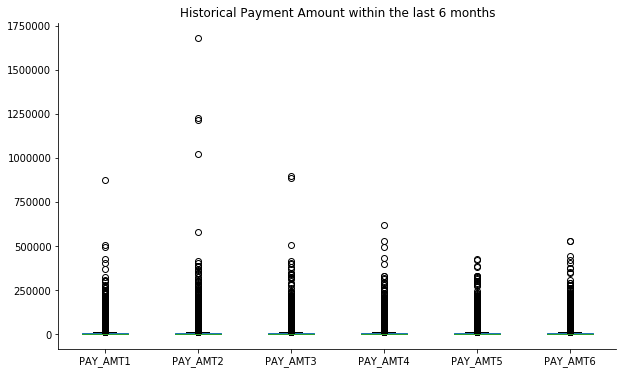

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
boxplot = df.iloc[:,19:25].boxplot(grid = False)
plt.title("Historical Payment Amount within the last 6 months")
plt.show()

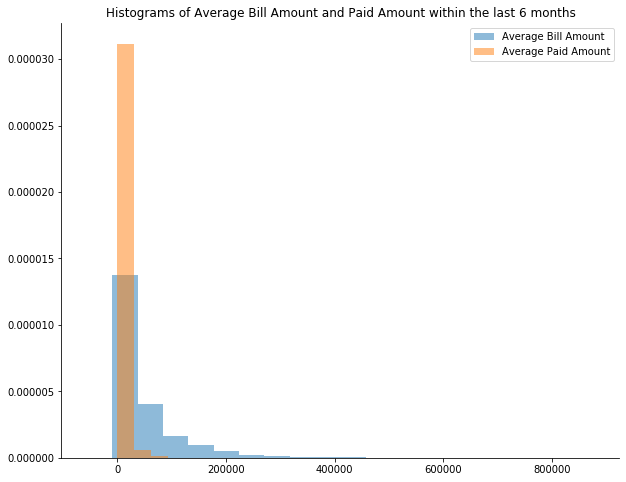

In [109]:
Bill = df.iloc[:,13:19]
Paid = df.iloc[:,19:25]

Average_Bill_Amount = Bill.mean(axis=1)
Average_Paid_Amount = Paid.mean(axis=1)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.hist(Average_Bill_Amount, density = True, bins = 20, alpha = 0.5, label = "Average Bill Amount")
plt.hist(Average_Paid_Amount, density = True, bins = 20, alpha = 0.5, label = "Average Paid Amount")
plt.legend(loc='upper right')
plt.title("Histograms of Average Bill Amount and Paid Amount within the last 6 months")
plt.show()

Text(0.5, 1, 'Correlation Map between Historical Payment Status')

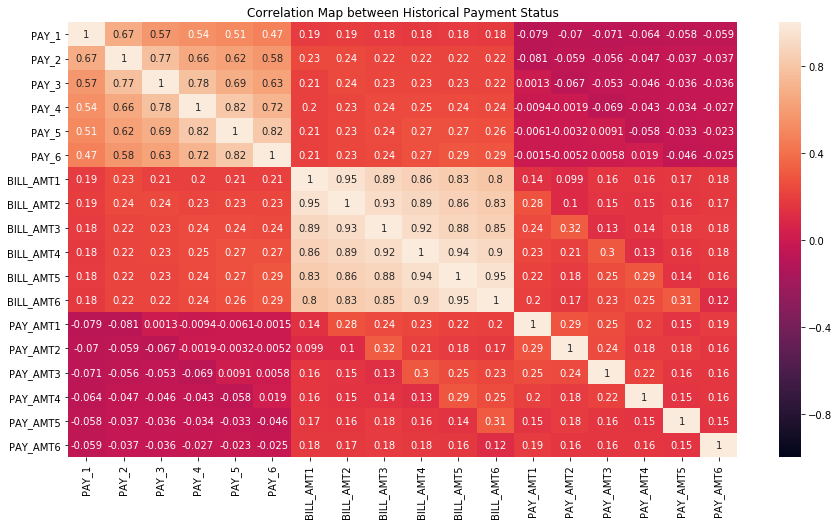

In [121]:
import seaborn as sb
plt.figure(figsize = (15,8))
corrmat = df.iloc[:,7:26].corr()
sb.heatmap(corrmat, vmax = 1, vmin = -1, annot = True)
plt.title("Correlation Map between Historical Payment Status")

# Data Preparation

### 1. Missing Values Imputation
Replace missing values with the most frequent values

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

### 2. Encoding

In [9]:
# Encoding for "Sex": Female as 1
Sex = pd.get_dummies(df.SEX)
df ["Female"] = Sex.Female

#Encoding for "Education"
Edu = pd.get_dummies(df.EDUCATION)
Edu.columns = [c.replace(' ', '_') for c in Edu.columns]
df ["Graduate"] = Edu.Graduate
df ["University"] = Edu.University
df ["High School"] = Edu.High_School

#Encoding for "Marriage"
Marr = pd.get_dummies(df.MARRIAGE)
df ["Single"] = Marr.Single
df ["Married"] = Marr.Married

df = df.drop(["SEX", "EDUCATION", "MARRIAGE"],axis=1)

df1=df.astype(float)
df1.head(10)

,ID,default.payment.next.month,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Female,Graduate,University,High School,Single,Married
0,1.0,1.0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,...,1000.0,1000.0,0.0,2000.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,0.0,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1000.0,1000.0,1000.0,5000.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,0.0,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1200.0,1100.0,1069.0,1000.0,1.0,0.0,1.0,0.0,0.0,1.0
4,5.0,0.0,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,...,10000.0,9000.0,689.0,679.0,0.0,0.0,1.0,0.0,0.0,1.0
5,6.0,0.0,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,657.0,1000.0,1000.0,800.0,0.0,1.0,0.0,0.0,1.0,0.0
6,7.0,0.0,500000.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38000.0,20239.0,13750.0,13770.0,0.0,1.0,0.0,0.0,1.0,0.0
7,8.0,0.0,100000.0,23.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,...,0.0,581.0,1687.0,1542.0,1.0,0.0,1.0,0.0,1.0,0.0
8,9.0,0.0,140000.0,28.0,0.0,0.0,2.0,0.0,0.0,0.0,...,432.0,1000.0,1000.0,1000.0,1.0,0.0,0.0,1.0,0.0,1.0
9,10.0,0.0,20000.0,35.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,...,0.0,13007.0,1122.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [10]:
df1.shape

(30000, 28)

# Data Sampling

In [11]:
#Stratified 

Xs = df1.iloc[:, 2:28].values
Y = df1.iloc[:, 1].values

from sklearn.model_selection import train_test_split
Xs_train, Xs_test, Y_train, Y_test = train_test_split(Xs, Y, test_size=0.33, random_state=42, stratify=Y)


# Fitting Model

### 1. Simple Models (Phyllis)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

##### Logistic Model

In [41]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0).fit(Xs_train, Y_train)
y_pred = classifier.predict(Xs_test).astype(int)
test = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1), 
                    columns = ['Predicted', 'Actual'])

cm = confusion_matrix(Y_test, y_pred)
predicted_prob = classifier.predict_proba(Xs_test)
print(f'Confusion Matrix:\n{cm}')
print(f'Accuracy Score: {accuracy_score(Y_test, y_pred)}')
print(f'AUC Score: {roc_auc_score(Y_test, predicted_prob[:,1])}')
test.head()

Confusion Matrix:
[[7710    0]
 [2189    1]]
Accuracy Score: 0.7788888888888889
AUC Score: 0.6449654424959579


/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Predicted,Actual
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0


In [81]:
from scipy.stats import norm

def logit_pvalue(model, x):

    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

# p-values of test data
classifier = LogisticRegression(C=1e30).fit(Xs_train, Y_train)
test_p = logit_pvalue(classifier, Xs_train)


# compare with train data
import statsmodels.api as sm
sm_model = sm.Logit(Y_train, sm.add_constant(Xs_train)).fit(disp=0)
train_p = sm_model.pvalues
sm_model.summary()

index_p = df1.columns.values[1:]
index_p.transpose()
p_value_compare = pd.DataFrame(np.concatenate((test_p.reshape(len(test_p),1), train_p.reshape(len(train_p),1)),1), 
                    columns = ['Test data', 'Train data'],index = index_p)
print(p_value_compare)



/Users/phyllis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


                               Test data     Train data
default.payment.next.month  9.999950e-01   4.764794e-11
LIMIT_BAL                   0.000000e+00   3.445931e-05
AGE                         9.834923e-01   1.231375e-01
PAY_1                       9.998674e-01  9.155510e-156
PAY_2                       9.999115e-01   1.047612e-04
PAY_3                       9.999291e-01   7.420088e-03
PAY_4                       9.999387e-01   1.110946e-01
PAY_5                       9.999479e-01   6.391715e-01
PAY_6                       9.999387e-01   5.228192e-01
BILL_AMT1                   2.501704e-08   9.607007e-04
BILL_AMT2                   4.123163e-01   8.672990e-01
BILL_AMT3                   1.227340e-01   3.622449e-01
BILL_AMT4                   6.997363e-01   9.637463e-01
BILL_AMT5                   6.533466e-03   6.548787e-01
BILL_AMT6                   2.031733e-01   8.943862e-01
PAY_AMT1                    8.881784e-15   2.659048e-04
PAY_AMT2                    0.000000e+00   6.103

### 2. Complex Models

In [14]:
# K-NN
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 2)
KNN.fit(Xs_train, Y_train)

y_pred = KNN.predict(Xs_test).astype(int)
test = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1), 
                    columns = ['Predicted', 'Actual'])

cm = confusion_matrix(Y_test, y_pred)
predicted_prob = KNN.predict_proba(Xs_test)
print(f'Confusion Matrix:\n{cm}')
print(f'Accuracy Score: {accuracy_score(Y_test, y_pred)}')
print(f'AUC Score: {roc_auc_score(Y_test, predicted_prob[:,1])}')
test.head()

Confusion Matrix:
[[7575  135]
 [2072  118]]
Accuracy Score: 0.777070707070707
AUC Score: 0.647174961059882


,Predicted,Actual
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,1.0,0.0


##### a) Ensemble

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [16]:
n_trees = np.array([20, 100, 200, 500])
learning_rates = np.array([0.1, 0.3, 0.5, 0.8])

In [17]:
#XGBoost
from xgboost import XGBClassifier
learning_rates = np.array([0.1, 0.3, 0.5, 0.8])

AUC_XGBC = []
accuracy_XGBC = []

for learning_rate in learning_rates:
    XGBC = XGBClassifier(booster = "gbtree", learning_rate=learning_rate)        
    XGBC.fit(Xs_train,Y_train)
    predicted_XGBC = XGBC.predict(Xs_test)
    
    prob_XGBC = XGBC.predict_proba(Xs_test)
    AUC_XGBC.append(roc_auc_score(Y_test, prob_XGBC[:,1]))
    accuracy_XGBC.append(accuracy_score(Y_test, predicted_XGBC))

XGBC_score_df = pd.DataFrame(AUC_XGBC, columns = ['AUC'], index = learning_rates)
XGBC_score_df['Accuracy'] = accuracy_XGBC
XGBC_score_df

,AUC,Accuracy
0.1,0.778377,0.817980
0.3,0.772259,0.814545
0.5,0.764027,0.812121
0.8,0.756180,0.806061


In [27]:
#Random Forest
accuracy_RF=[]
AUC_RFC = []

for n in n_trees:
    RFC = RandomForestClassifier(n_estimators=n, max_depth=4, random_state=0)     
    RFC.fit(Xs_train,Y_train)        
    predicted_RFC = RFC.predict(Xs_test)
    
    prob_RFC = RFC.predict_proba(Xs_test)
    AUC_RFC.append(roc_auc_score(Y_test, prob_RFC[:,1]))
    accuracy_RF.append(accuracy_score(Y_test, y_pred))

print(accuracy_RF)
print (AUC_RFC)

[0.7534343434343435, 0.7534343434343435, 0.7534343434343435, 0.7534343434343435]
[0.7637251627193529, 0.7650533020627899, 0.7648685511907088, 0.7652705671931724]


In [84]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(Xs_train, Y_train)

y_pred = classifier.predict(Xs_test).astype(int)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

cm = confusion_matrix(Y_test, y_pred)
predicted_prob = classifier.predict_proba(Xs_test)
     
print(f'Confusion Matrix:\n{cm}')
print(f'Accuracy Score: {accuracy_score(Y_test, y_pred)}')
print(f'AUC Score: {roc_auc_score(Y_test, predicted_prob[:,1])}')

Confusion Matrix:
[[2171 5539]
 [ 351 1839]]
Accuracy Score: 0.40505050505050505
AUC Score: 0.6611536935368287


##### b) Neural Network